In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
hp_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

## Model 1

In [2]:
# Y is the target variable
Y2 = hp_df['saleprice']
# X is the feature set
X2 = hp_df[['grlivarea','overallqual']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X2, Y2)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [   55.86222591 32849.04744063]

Intercept: 
 -104092.66963598129


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 465)

In [6]:
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [7]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1456.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):          1.15e-317
Time:                        11:19:48   Log-Likelihood:                -14094.
No. Observations:                1168   AIC:                         2.819e+04
Df Residuals:                    1165   BIC:                         2.821e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.056e+05   5632.633    -18.756      

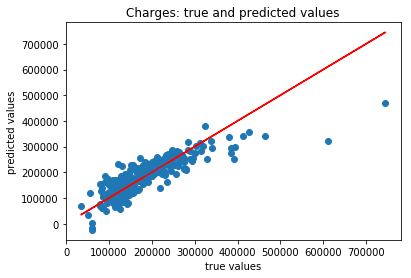

Mean absolute error of the prediction is: 30384.0555181634
Mean squared error of the prediction is: 1935027360.0281346
Root mean squared error of the prediction is: 43988.94588448483
Mean absolute percentage error of the prediction is: 19.212058388087993


In [8]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

## Model 2

In [9]:
# Y is the target variable
Y2 = hp_df['saleprice']
# X is the feature set
X2 = hp_df[['grlivarea','overallqual', 'garagecars', 'fullbath', 'fireplaces', 'yearbuilt', 'yearremodadd', 'totrmsabvgrd']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X2, Y2)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [   58.64977899 20526.59671243 15617.48454101 -8280.94448954
 11563.95865355   344.45117267   298.66280008  -910.88281567]

Intercept: 
 -1320759.3485210259


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 465)

In [11]:
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [12]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     463.5
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:57:59   Log-Likelihood:                -13988.
No. Observations:                1168   AIC:                         2.799e+04
Df Residuals:                    1159   BIC:                         2.804e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.26e+06   1.48e+05     -8.532   

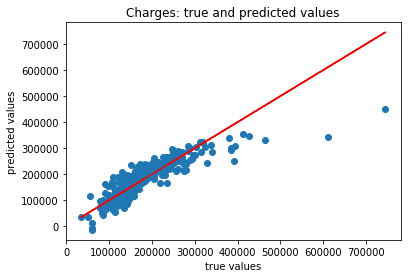

Mean absolute error of the prediction is: 27423.859665852677
Mean squared error of the prediction is: 1658580099.1709032
Root mean squared error of the prediction is: 40725.66879955323
Mean absolute percentage error of the prediction is: 16.489650903993972


In [13]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

We can see that by all 4 measures the second model, with more features, did a better job predicting saleprice.